<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Compendio-graph-polar-fixed-S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerías

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
def find_S4_cluster(X,i=50,plt_s4=0):
  #Function expect an array 2D, minimun number of points desired for each cluster
  #And return an array with number of groups and number of points for each groups. As well return an array with initial array filtered with "i" like minimun number of points for each group

  from sklearn.metrics import silhouette_score
  from sklearn.cluster import KMeans
  import pandas as pd


#1
  sil = []
  kmax = 10


  # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  best_k=np.argmax(sil)+2


  #2
  
  kmeans = KMeans(n_clusters=best_k)
  model=kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

  print(np.unique(y_kmeans))

  #3
  wq = model.labels_
  df = pd.DataFrame(wq)
  counts=df.value_counts()
  index=[]
  for i in counts[counts.values>i].index.values:
    index.append(i[0])
  #print(index)



  #df = pd.DataFrame(y_kmeans)
  #counts=df.value_counts()
  #print(counts)


  groups_s4 = pd.DataFrame(X,columns=['Tiempo','S4'])
  groups_s4['kmeans']=y_kmeans
  #print(df)
  #print(df.isin(index))
  #print(groups_s4[df.isin(index)])
  #print(groups_s4.filter(like = index, axis=0))
  #print(counts)
  #print(groups_s4)
  groups_filter=groups_s4[groups_s4.kmeans.isin(index)]

  if plt_s4==1:
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  elif plt_s4==2:
    plt.scatter(groups_filter.Tiempo, groups_filter.S4, c=groups_filter.kmeans, s=50, cmap='viridis')
  return (counts,groups_filter)


##Importando data

In [3]:
#tag='Piura'
#tag='Cuzco'
tag='Huancayo'
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/Compendio/S4%20"+tag+"%20Feb-2021.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
Data = pd.read_csv('/content/gdrive/My Drive/gfajardo_uNz2xU-2020.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [ ]:
tag='S4 Piura Feb-2021'
#Data = pd.read_csv('/content/gdrive/My Drive/2019-2021.csv',index_col=False) 
Data = pd.read_csv('/content/gdrive/My Drive/'+tag+'.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [87]:
s4['Az']=s4['Az']/(np.pi*2)
s4['Elv']=s4['Elv']/90

##Transformando columnas de tiempo a formato datetime

In [71]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])

s4.head(20)

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time
0,21,32,2,1,0.21,24.2,17.9,2021-02-01 00:00:02
1,21,32,2,3,0.09,92.3,34.7,2021-02-01 00:00:02
2,21,32,2,4,0.17,142.2,17.4,2021-02-01 00:00:02
3,21,32,2,6,0.05,232.7,46.4,2021-02-01 00:00:02
4,21,32,2,7,0.03,353.8,87.9,2021-02-01 00:00:02
5,21,32,2,9,0.06,177.8,37.8,2021-02-01 00:00:02
6,21,32,2,17,0.12,315.7,18.5,2021-02-01 00:00:02
7,21,32,2,19,0.13,290.5,17.7,2021-02-01 00:00:02
8,21,32,2,22,0.19,69.6,18.5,2021-02-01 00:00:02
9,21,32,2,30,0.04,326.3,50.2,2021-02-01 00:00:02


##Aplicando filtros

In [64]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['S4'])]
s4_clean.set_index('date_time', inplace=True)
s4_1min=s4_clean.resample("10s").mean()


#Filtros
s4_clean=s4_clean[s4_clean['Elv']>30]

##Hallando máximos (Valores S4>0.4)

In [6]:
s4_max=s4_clean[s4_clean['S4']>0.4]
print(s4_max)

                     Año  Day  Tiempo  PRN    S4     Az   Elv
date_time                                                    
2021-02-05 13:19:02   21   36   47942   20  0.46   65.4  60.3
2021-02-05 13:19:02   21   36   47942   23  0.41   58.8  53.8
2021-02-05 13:19:02   21   36   47942   25  0.43   58.7  38.6
2021-02-05 13:19:02   21   36   47942   26  0.45  205.5  40.8
2021-02-05 13:23:02   21   36   48182   20  0.53   69.5  61.0
2021-02-05 13:23:02   21   36   48182   23  0.53   62.0  54.8
2021-02-05 13:23:02   21   36   48182   25  0.48   56.8  37.3
2021-02-05 13:23:02   21   36   48182   26  0.46  205.3  42.6
2021-02-14 17:25:38   21   45   62738   32  0.48  126.8  31.6
2021-02-23 21:12:07   21   54   76327    1  0.48   38.9  51.4
2021-02-23 21:12:07   21   54   76327    7  0.42  353.2  49.3
2021-02-26 06:31:07   21   57   23467    2  0.44   71.7  34.6
2021-02-26 06:31:07   21   57   23467   12  0.43  197.4  40.1
2021-02-26 06:31:07   21   57   23467   15  0.52  341.0  55.9
2021-02-

#Segundos a horas

In [7]:
s4_clean['Tiempo']=s4_clean['Tiempo']/3600

In [8]:
print(np.unique(s4_max.index.date))

[datetime.date(2021, 2, 5) datetime.date(2021, 2, 14)
 datetime.date(2021, 2, 23) datetime.date(2021, 2, 26)]


In [10]:
print(np.unique(s4_max.Elv))

[31.6 34.6 37.3 38.6 40.1 40.8 42.6 49.3 50.6 51.4 53.8 54.8 55.8 55.9
 60.3 61. ]


[0 1 2 3 4 5 6 7 8]
3    55
1    42
4    40
0    30
2    23
7    22
6    18
8    15
5    15
dtype: int64
      Tiempo    S4  kmeans
0       62.0  0.10       3
1      182.0  0.10       3
2     1142.0  0.13       3
3     1142.0  0.10       3
4     1202.0  0.10       3
..       ...   ...     ...
255  84062.0  0.14       7
256  84122.0  0.11       7
257  84242.0  0.11       7
258  84302.0  0.11       7
259  84422.0  0.10       7

[260 rows x 3 columns]
[0 1 2 3 4 5 6 7]
0    37
3    35
7    15
4    13
2    12
5    10
1    10
6     4
dtype: int64
      Tiempo    S4  kmeans
0      902.0  0.12       0
1     1202.0  0.13       0
2     1502.0  0.12       0
3     1562.0  0.12       0
4     2822.0  0.13       0
..       ...   ...     ...
131  83582.0  0.12       2
132  83642.0  0.16       2
133  83702.0  0.16       2
134  83822.0  0.13       2
135  84242.0  0.12       2

[112 rows x 3 columns]
[0 1 2]
1    122
0     34
2      7
dtype: int64
      Tiempo    S4  kmeans
0     1442.0  0.13       1
1 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0 1 2]
1    106
0     79
2     32
dtype: int64
      Tiempo    S4  kmeans
0      482.0  0.12       1
1      542.0  0.11       1
2      602.0  0.12       1
3     1022.0  0.11       1
4     5522.0  0.11       1
..       ...   ...     ...
212  82622.0  0.17       2
213  82682.0  0.15       2
214  82742.0  0.16       2
215  82802.0  0.11       2
216  82862.0  0.13       2

[217 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2]
2    139
0     63
1     39
dtype: int64
      Tiempo    S4  kmeans
0      302.0  0.12       2
1      362.0  0.15       2
2     1502.0  0.14       2
3     2402.0  0.16       2
4     2462.0  0.15       2
..       ...   ...     ...
236  82382.0  0.17       1
237  82442.0  0.14       1
238  82502.0  0.14       1
239  82622.0  0.12       1
240  82802.0  0.12       1

[241 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7]
3    43
0    42
7    24
1    14
2    13
6    12
4    11
5    10
dtype: int64
      Tiempo    S4  kmeans
0        2.0  0.12       0
1      122.0  0.14       0
2     2702.0  0.12       0
3     2942.0  0.12       0
4     3182.0  0.13       0
..       ...   ...     ...
164  82022.0  0.12       2
165  82142.0  0.16       2
166  82202.0  0.15       2
167  82262.0  0.15       2
168  82382.0  0.13       2

[159 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6]
0    45
1    25
3    23
2    11
6    10
4     9
5     6
dtype: int64
      Tiempo    S4  kmeans
0      242.0  0.11       3
1     5042.0  0.11       3
2     5222.0  0.11       3
3     5282.0  0.14       3
4     5342.0  0.12       3
..       ...   ...     ...
118  54302.0  0.11       1
119  54302.0  0.11       1
120  54482.0  0.11       1
121  54542.0  0.12       1
122  54662.0  0.12       1

[104 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7]
1    7
3    6
6    4
2    4
4    3
0    3
5    2
7    1
dtype: int64
Empty DataFrame
Columns: [Tiempo, S4, kmeans]
Index: []


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
0    123
1     66
dtype: int64
      Tiempo    S4  kmeans
0     4174.0  0.14       0
1     4354.0  0.12       0
2     4354.0  0.14       0
3     4354.0  0.12       0
4     4414.0  0.15       0
..       ...   ...     ...
184  71794.0  0.12       1
185  71794.0  0.11       1
186  71854.0  0.12       1
187  72274.0  0.12       1
188  73834.0  0.11       1

[189 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7 8 9]
0    29
7    24
6    22
2    20
3    17
4    14
1    11
9    10
5    10
8     6
dtype: int64
      Tiempo    S4  kmeans
0     3638.0  0.15       4
1     3938.0  0.12       4
2     4058.0  0.12       4
3     4118.0  0.11       4
4     4178.0  0.11       4
..       ...   ...     ...
158  80438.0  0.13       3
159  80498.0  0.11       3
160  80678.0  0.14       3
161  80738.0  0.14       3
162  80798.0  0.16       3

[137 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


0    73
1    56
2    20
dtype: int64
      Tiempo    S4  kmeans
0     3638.0  0.13       0
1     3818.0  0.13       0
2     4058.0  0.12       0
3     4118.0  0.12       0
4     5378.0  0.11       0
..       ...   ...     ...
144  80498.0  0.13       2
145  80558.0  0.14       2
146  80678.0  0.11       2
147  80858.0  0.11       2
148  85478.0  0.11       2

[149 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0 1 2]
0    86
1    58
2    19
dtype: int64
      Tiempo    S4  kmeans
0     3578.0  0.13       1
1     3638.0  0.14       1
2     3818.0  0.12       1
3     3878.0  0.13       1
4     6158.0  0.13       1
..       ...   ...     ...
158  80258.0  0.12       2
159  80318.0  0.15       2
160  80558.0  0.12       2
161  80678.0  0.13       2
162  84278.0  0.12       2

[163 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
1    189
0     29
dtype: int64
      Tiempo    S4  kmeans
0     2918.0  0.14       1
1     3338.0  0.12       1
2     3638.0  0.13       1
3     5018.0  0.14       1
4     5078.0  0.12       1
..       ...   ...     ...
213  79718.0  0.13       0
214  80018.0  0.12       0
215  80078.0  0.13       0
216  80318.0  0.13       0
217  80318.0  0.12       0

[218 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7]
1    57
2    50
6    43
0    20
3    17
7    11
4    11
5    10
dtype: int64
      Tiempo    S4  kmeans
0     2918.0  0.11       2
1     2918.0  0.14       2
2     3098.0  0.11       2
3     3098.0  0.11       2
4     3338.0  0.11       2
..       ...   ...     ...
214  80078.0  0.11       0
215  80138.0  0.11       0
216  83798.0  0.12       0
217  84878.0  0.11       0
218  84938.0  0.11       0

[209 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
0    123
1     37
dtype: int64
      Tiempo    S4  kmeans
0     2918.0  0.13       0
1     3038.0  0.12       0
2     3158.0  0.12       0
3     4058.0  0.14       0
4     4178.0  0.12       0
..       ...   ...     ...
155  65738.0  0.12       1
156  66878.0  0.12       1
157  79478.0  0.12       1
158  79538.0  0.13       1
159  79838.0  0.13       1

[160 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7 8 9]
0    33
3    26
2    24
5    23
6    20
1    17
4    16
9    15
8    14
7    13
dtype: int64
      Tiempo    S4  kmeans
0      578.0  0.10       9
1     1298.0  0.10       9
2     2198.0  0.12       9
3     2438.0  0.10       9
4     2738.0  0.11       9
..       ...   ...     ...
196  79658.0  0.12       2
197  80198.0  0.10       2
198  82298.0  0.10       2
199  82358.0  0.10       2
200  82718.0  0.10       2

[201 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7 8 9]
5    24
6    23
7    21
3    19
2    16
9    14
4    11
1     9
0     9
8     5
dtype: int64
      Tiempo    S4  kmeans
5    11587.0  0.11       4
6    11647.0  0.11       4
7    11707.0  0.13       4
8    11887.0  0.11       4
9    12067.0  0.12       4
..       ...   ...     ...
146  79387.0  0.12       5
147  79447.0  0.12       5
148  79927.0  0.11       5
149  83287.0  0.11       5
150  83767.0  0.11       5

[128 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
0    215
1     35
dtype: int64
      Tiempo    S4  kmeans
0     2107.0  0.15       0
1     2167.0  0.13       0
2     2347.0  0.16       0
3     2467.0  0.13       0
4     3487.0  0.13       0
..       ...   ...     ...
245  78667.0  0.14       1
246  78787.0  0.14       1
247  78847.0  0.13       1
248  78907.0  0.13       1
249  83347.0  0.13       1

[250 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
0    155
1     23
dtype: int64
      Tiempo    S4  kmeans
0     3427.0  0.14       0
1     3547.0  0.14       0
2     3607.0  0.17       0
3     4507.0  0.18       0
4     4627.0  0.19       0
..       ...   ...     ...
173  76687.0  0.39       1
174  76687.0  0.34       1
175  76687.0  0.21       1
176  76687.0  0.30       1
177  76687.0  0.28       1

[178 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7 8 9]
5    23
2    21
6    15
3    15
1    14
7    10
4    10
8     7
0     7
9     5
dtype: int64
      Tiempo    S4  kmeans
10    9367.0  0.11       3
11   10867.0  0.11       3
12   10927.0  0.11       3
13   10987.0  0.12       3
14   11047.0  0.11       3
..       ...   ...     ...
122  78367.0  0.11       1
123  78427.0  0.13       1
124  78607.0  0.13       1
125  78727.0  0.11       1
126  82687.0  0.12       1

[88 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6 7]
3    37
5    36
4    33
7    27
2    27
6    24
0    24
1    15
dtype: int64
      Tiempo    S4  kmeans
0      127.0  0.10       0
1     1267.0  0.11       0
2     1387.0  0.11       0
3     1447.0  0.10       0
4     1447.0  0.13       0
..       ...   ...     ...
218  81427.0  0.11       3
219  81487.0  0.10       3
220  82447.0  0.12       3
221  82627.0  0.10       3
222  82807.0  0.10       3

[223 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2 3 4 5 6]
1    30
0    14
2    13
4    10
5     6
6     5
3     5
dtype: int64
     Tiempo    S4  kmeans
10  23227.0  0.39       1
11  23227.0  0.19       1
12  23227.0  0.22       1
13  23227.0  0.31       1
14  23227.0  0.29       1
15  23227.0  0.34       1
16  23287.0  0.30       1
17  23287.0  0.20       1
18  23287.0  0.14       1
19  23287.0  0.17       1
20  23287.0  0.18       1
21  23287.0  0.22       1
22  23347.0  0.21       1
23  23347.0  0.21       1
24  23347.0  0.13       1
25  23347.0  0.12       1
26  23347.0  0.12       1
27  23407.0  0.16       1
28  23407.0  0.18       1
29  23407.0  0.17       1
30  23407.0  0.26       1
31  23407.0  0.22       1
32  23407.0  0.13       1
33  23467.0  0.44       1
34  23467.0  0.43       1
35  23467.0  0.24       1
36  23467.0  0.52       1
37  23467.0  0.62       1
38  23467.0  0.49       1
39  27427.0  0.14       1
50  49087.0  0.13       0
51  49147.0  0.13       0
52  49207.0  0.12       0
53  49267.0  0.12       0
54  4

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1]
0    203
1     26
dtype: int64
      Tiempo    S4  kmeans
0      727.0  0.12       0
1      907.0  0.12       0
2     3547.0  0.13       0
3     3607.0  0.13       0
4     3787.0  0.13       0
..       ...   ...     ...
224  77347.0  0.12       1
225  77527.0  0.13       1
226  77587.0  0.13       1
227  78007.0  0.13       1
228  82087.0  0.13       1

[229 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much 

[0 1 2]
0    73
2    44
1    22
dtype: int64
      Tiempo    S4  kmeans
0      667.0  0.12       0
1      727.0  0.12       0
2      847.0  0.11       0
3      907.0  0.11       0
4     3307.0  0.12       0
..       ...   ...     ...
134  77467.0  0.11       1
135  77467.0  0.11       1
136  77767.0  0.12       1
137  81427.0  0.12       1
138  81847.0  0.11       1

[139 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


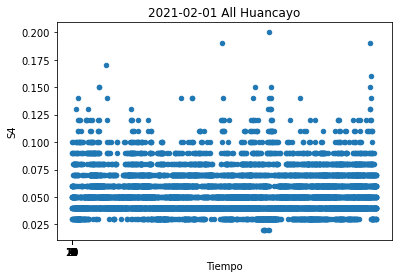

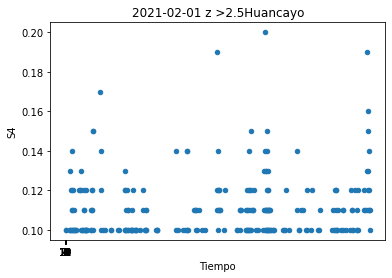

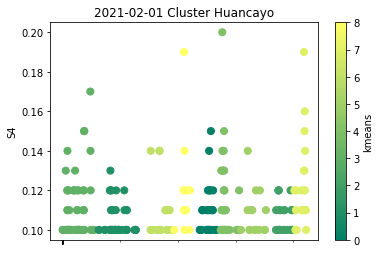

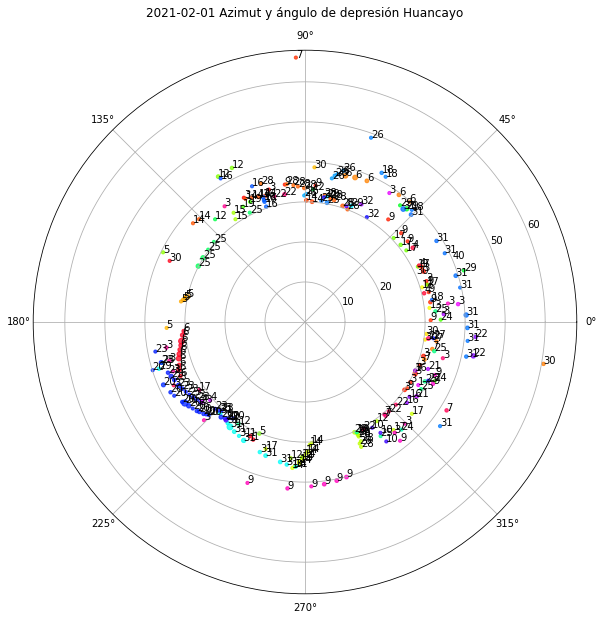

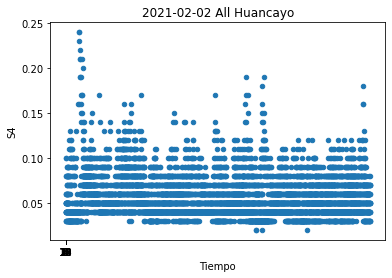

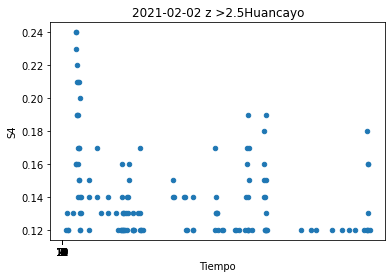

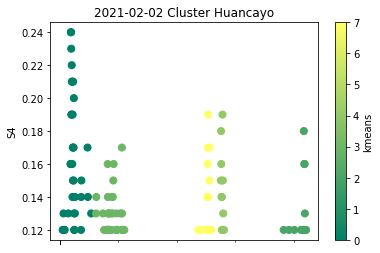

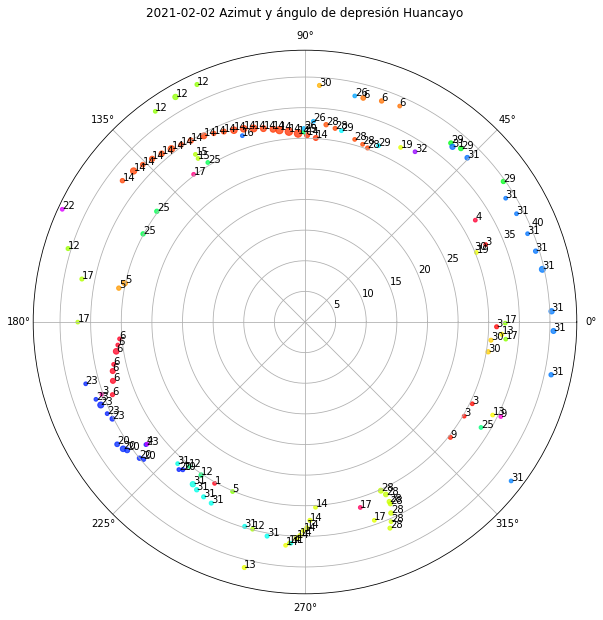

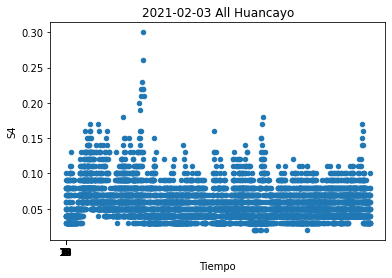

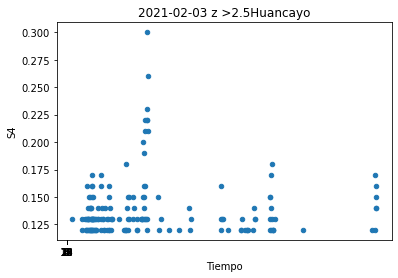

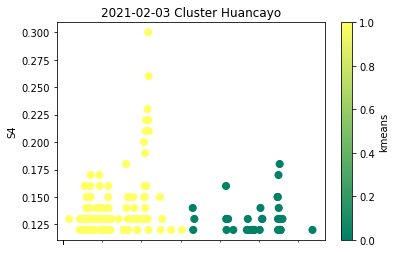

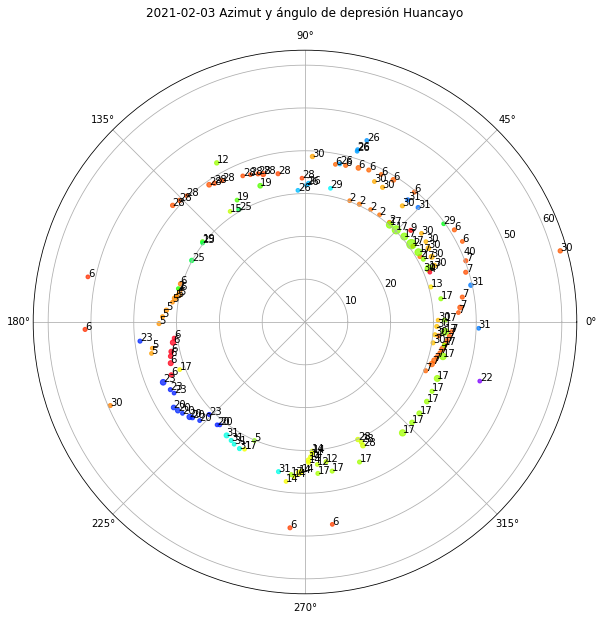

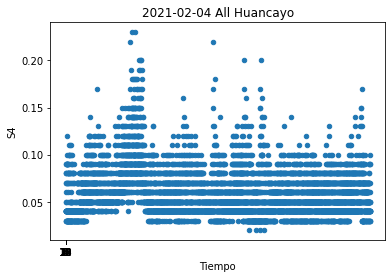

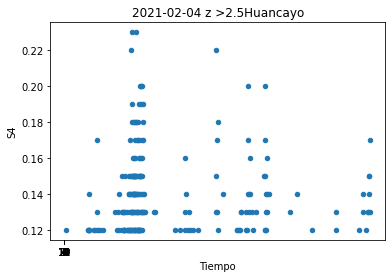

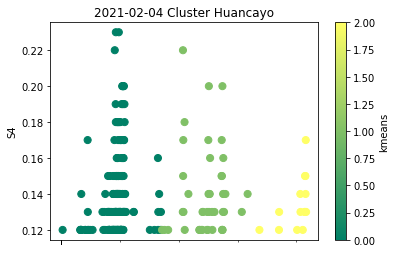

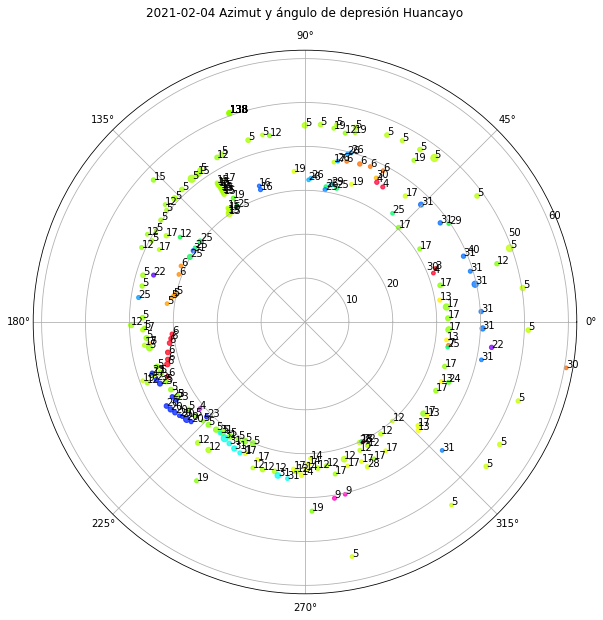

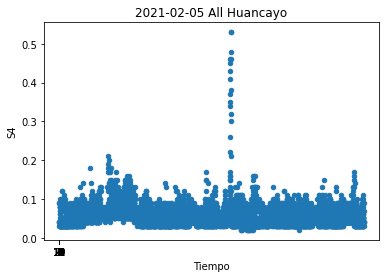

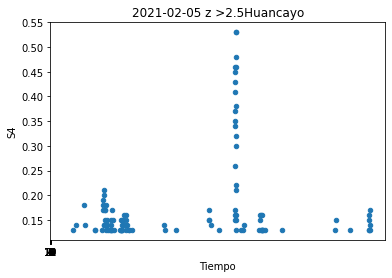

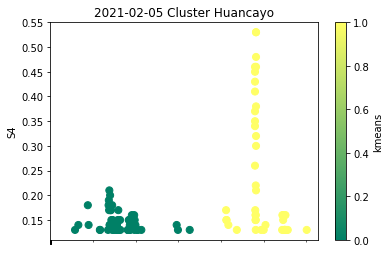

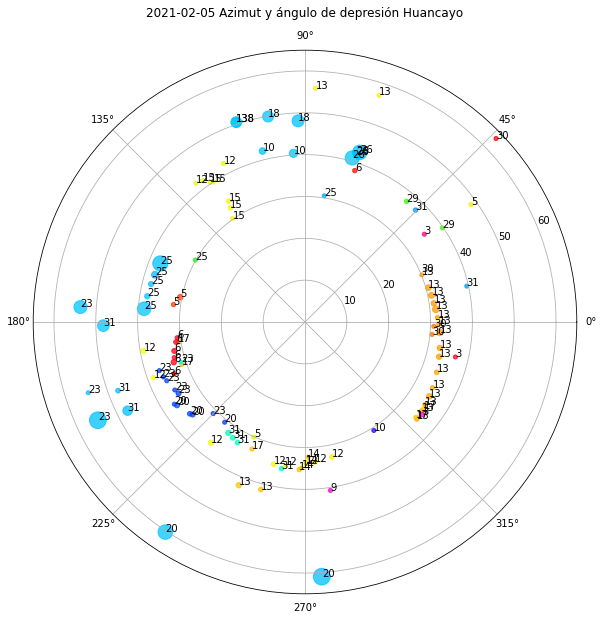

In [ ]:
for i in np.unique(s4_clean.index.date):
  s4_day_sp=s4_clean[s4_clean['Day']==i.timetuple().tm_yday]
  s4_day_sp1=s4_day_sp[s4_day_sp['Año']==i.year-2000]

  from scipy import stats
  import numpy as np
  z = np.abs(stats.zscore(s4_day_sp1.S4))
  #print(z)
  s4_day_i = s4_day_sp1[(z >2.5)]
  #print(s4_day_i)



  s4_day_sp1.plot.scatter(x='Tiempo',y='S4')
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' All '+tag)

  #s4_1min=s4_day_i.resample("1min").mean()
  s4_1min=s4_day_i
  s4_1min.plot.scatter(x='Tiempo',y='S4')
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' z >2.5'+tag)

  s4_day_i_Tiempo_S4=s4_day_i[['Tiempo','S4']].to_numpy()
  counts, clusters=find_S4_cluster(s4_day_i_Tiempo_S4,10)
  clusters.plot.scatter(x='Tiempo',y='S4',c='kmeans', s=50, cmap='summer')
  print(counts)
  print(clusters)
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' Cluster '+tag)


  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='polar')
  plt.title(str(i)+' Azimut y ángulo de depresión '+tag)
  c = ax.scatter(s4_1min.Az, s4_1min.Elv, c=s4_1min.Tiempo, s=s4_1min.S4*s4_1min.S4*1000, cmap='hsv', alpha=0.75)
  for i, txt in enumerate(s4_1min.PRN):
      s4azel=ax.annotate(txt, (s4_1min.Az[i],s4_1min.Elv[i]))
      #ax.colorbar(s4azel)

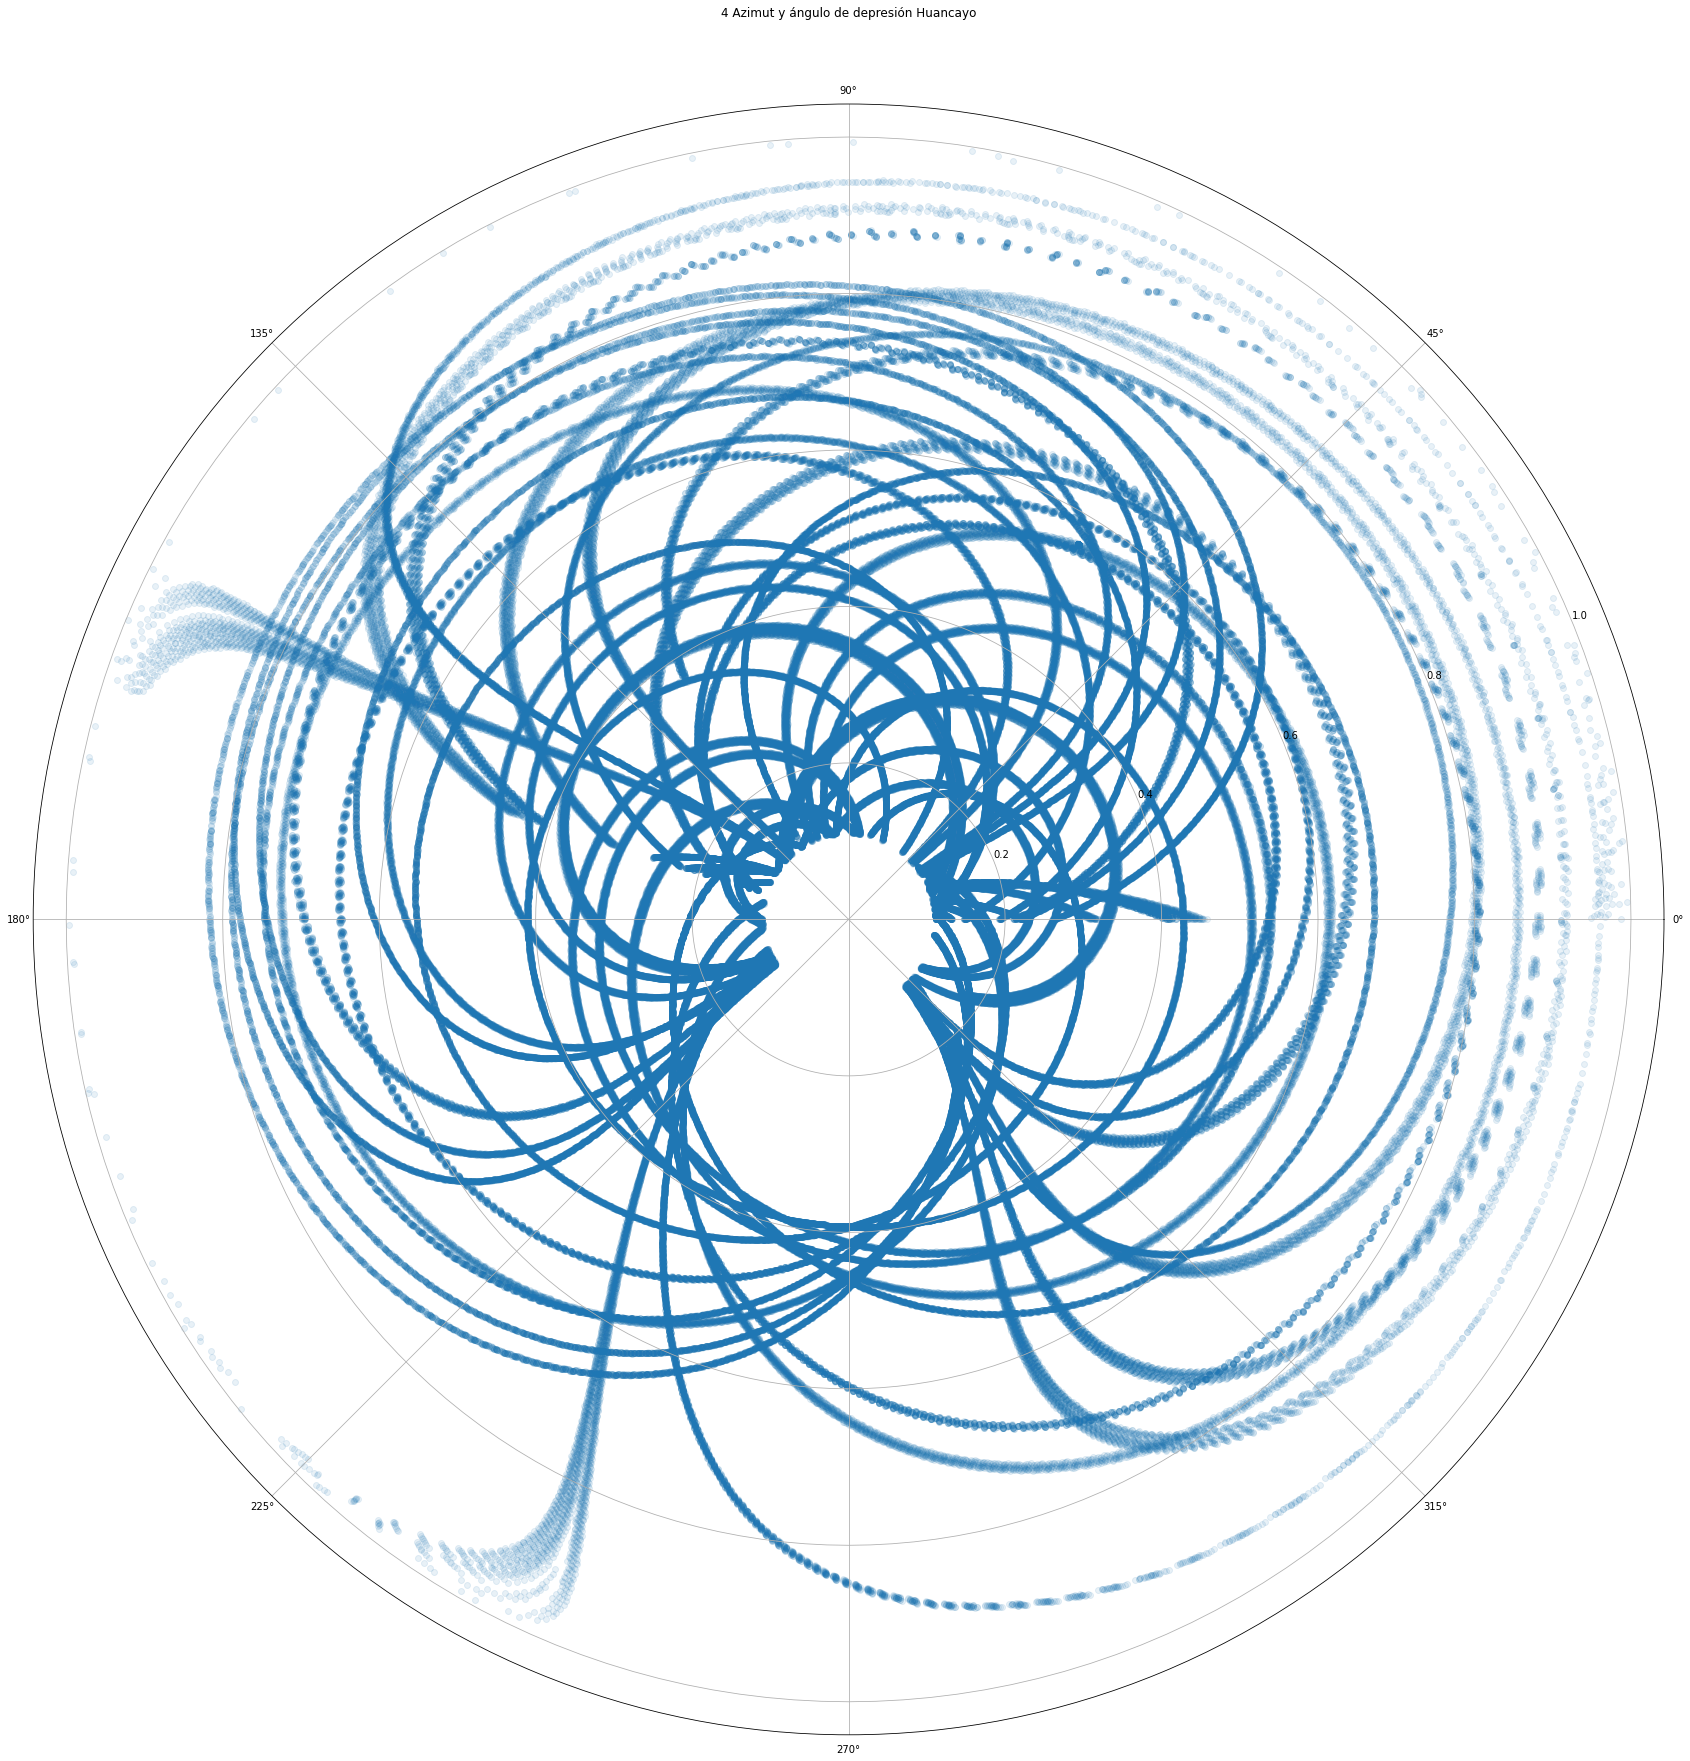

In [88]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(projection='polar')
plt.title(str(i)+' Azimut y ángulo de depresión '+tag)
c = ax.scatter(s4.Az, 1-s4.Elv,alpha=0.1)

      #ax.colorbar(s4azel)

2459246.500023148
[datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 7, 0, 0), datetime.dateti

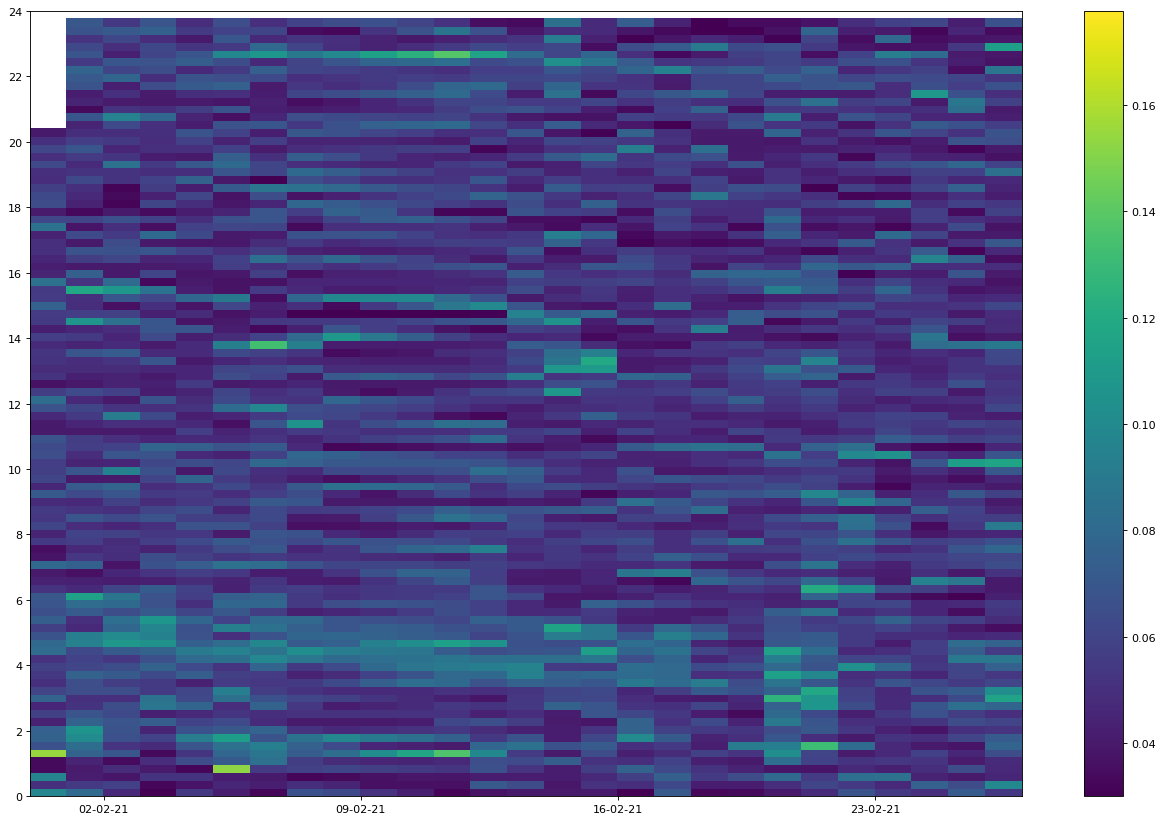

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure


from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


import matplotlib.ticker as ticker

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates




df=s4_clean

hour_minute=df.index.hour*60+df.index.minute
xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 100)
print(df.index.to_julian_date().min())

yi = np.linspace(hour_minute.min(), hour_minute.max(), 100)
zi = griddata((df.index.to_julian_date(),hour_minute),df.S4,(xi[None,:],yi[:,None]),method='linear')

xij = [jd2jcal(12,v) for v in xi]
xid = [datetime(x[0],x[1],x[2]) for x in xij]
print(xid)


fig, ax = plt.subplots(figsize=(20, 13), dpi=80) ##13 es un error de las fuunciones de transformación a días julianos que se debe comprobar aún 


# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.

levels = MaxNLocator(nbins=10).tick_values(df.S4.min(), df.S4.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)




#cp=ax.contour(xid,yi,zi,  3,colors='black')
#ax.clabel(cp, inline=True, fontsize=10)

m=ax.pcolormesh(xid, yi/60, zi)
plt.yticks(np.arange(0,25,2))#min(x), max(x)+1, 1.0))

# Define the date format
date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

fig.colorbar(m)

In [ ]:
from jdcal import jcal2jd
print(df.index.to_julian_date().min())
print(*jcal2jd(2021, 2, 1))

2459246.5005092593
2400000.5 59259.0


In [ ]:
clusters

,Tiempo,S4,kmeans
0,0.211944,0.18,0
1,1.028611,0.17,0
2,2.611944,0.17,0
3,2.928611,0.17,0
4,6.145278,0.18,0
...,...,...,...
130,18.878611,0.21,1
131,19.261944,0.18,1
132,19.478611,0.17,1
133,19.845278,0.17,1


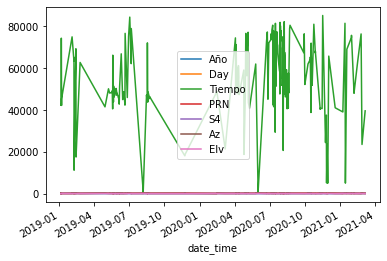

In [ ]:
s4_max.plot()

##Generando grupos

In [ ]:

#s4["Azint"]=s4["Az"].astype(float)

clasi=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))
#print(list(m))
print(clasi.groups.keys())
#print(np.arange(0, 360, 30))




dict_keys([Interval(0, 30, closed='right'), Interval(30, 60, closed='right'), Interval(60, 90, closed='right'), Interval(90, 120, closed='right'), Interval(120, 150, closed='right'), Interval(150, 180, closed='right'), Interval(180, 210, closed='right'), Interval(210, 240, closed='right'), Interval(240, 270, closed='right'), Interval(270, 300, closed='right'), Interval(300, 330, closed='right'), Interval(330, 360, closed='right')])


In [80]:
y = [360, 40, 40, 40, 40]
z = [0.15, 0.3, 0.45, 0.6, 0.9]
n = [58, 651, 393, 203, 123]


#y1=[x+90 if x<270 else x-270 for x in y]

print(np.multiply(100,z))
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(y, [1 - x for x in z], c=y, s=np.multiply(200,z), cmap='hsv', alpha=0.75)
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], 1-z[i]))
#ax.set_xticklabels(['E', '', 'N', '', 'W', '', 'S', ''])
ax.set_yticklabels(['90','','', '60','','',  '30'])

TypeError: ignored

In [75]:
np.pi

3.141592653589793